In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from matplotlib import style
import pickle
from sklearn import model_selection, datasets
from random import randint
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data18 = pd.read_csv('2018-QS-World-University-Rankings.csv',
                     encoding='latin-1',
                     header=[0, 1])
data19 = pd.read_csv('2019-QS-World-University-Rankings.csv',
                     encoding='latin-1',
                     header=[0, 1])
data20 = pd.read_csv('2020-QS-World-University-Rankings.csv',
                     encoding='latin-1',
                     header=[0, 1])

In [3]:
data18.head()

,2018,2017,Institution Name,Country,Classification,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Academic Reputation,...,Unnamed: 12_level_0,Faculty Student,Unnamed: 14_level_0,Citations per Faculty,Unnamed: 16_level_0,International Faculty,Unnamed: 18_level_0,International Students,Unnamed: 20_level_0,Overall Score
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,SIZE,FOCUS,RESEARCH INTENSITY,AGE,STATUS,SCORE,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,Unnamed: 21_level_1
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5.0,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5.0,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5.0,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6


## Resolving the columns disorgainisation to help in identifying the columns we are working on

In [4]:
def resolve_columns(df: pd.core.frame.DataFrame) -> list:
    cols = []
    rankNumber = 1
    for column in df:
        if column[0].startswith('Unnamed'):
            if column[1].startswith('RANK'):
                cols.append(column[1] + '_' + str(rankNumber))
                rankNumber +=1
            else:
                cols.append(column[1])
        elif column[1].startswith('Unnamed'):
            if column[0].startswith('RANK'):
                cols.append(column[0] + '_' + str(rankNumber))
                rankNumber +=1
            else:
                cols.append(column[0])
        else:
            cols.append(column[0] + ' ' + column[1].capitalize())
    return cols

In [5]:
data18.columns = resolve_columns(data18)
data19.columns = resolve_columns(data19)
data20.columns = resolve_columns(data20)
data18.dtypes

2018                             object
2017                             object
Institution Name                 object
Country                          object
Classification Size              object
FOCUS                            object
RESEARCH INTENSITY               object
AGE                             float64
STATUS                           object
Academic Reputation Score        object
RANK_1                           object
Employer Reputation Score        object
RANK_2                           object
Faculty Student Score            object
RANK_3                           object
Citations per Faculty Score      object
RANK_4                           object
International Faculty Score      object
RANK_5                           object
International Students Score     object
RANK_6                           object
Overall Score                    object
dtype: object

In [6]:
data19.head(15)

,2019,2018,Institution Name,Country,Classification Size,FOCUS,RESEARCH INTENSITY,AGE,STATUS,Academic Reputation Score,...,RANK_2,Faculty Student Score,RANK_3,Citations per Faculty Score,RANK_4,International Faculty Score,RANK_5,International Students Score,RANK_6,Overall Score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5.0,B,100,...,4,100,17,99.8,8,100,41,95.5,77,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,5,100,16,99,13,99.8,56,70.5,190,98.6
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5.0,B,98.7,...,72,100,4,100,5,96.8,115,90.3,103,97.2
4,5,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5.0,A,100,...,3,100,7,83,56,99.6,63,98.8,43,96.8
5,6,5,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5.0,A,100,...,2,100,11,77.2,71,99.4,71,97.9,53,95.6
6,7,10,ETH ZURICH (SWISS FEDERAL INSTITUTE OF TECHNOL...,Switzerland,L,CO,VH,5.0,A,98.2,...,27,82.4,131,98.7,15,100,18,98.6,49,95.3
7,8,8,IMPERIAL COLLEGE LONDON,United Kingdom,L,FC,VH,5.0,A,98.7,...,7,99.9,23,67.8,112,100,44,100,13,93.3
8,9,9,UNIVERSITY OF CHICAGO,United States,L,FC,VH,5.0,B,99.6,...,47,97.4,48,83.6,54,74.2,229,82.5,136,93.2
9,10,7,UCL (UNIVERSITY COLLEGE LONDON),United Kingdom,XL,FC,VH,5.0,A,99.3,...,16,99.2,41,66.2,121,98.7,82,100,16,92.9


In [7]:
#columns used for the determination of the rankings will be saved in a variable called det_columns
det_columns = ['Academic Reputation Score', 'Employer Reputation Score', 'Faculty Student Score',
               'Citations per Faculty Score', 'International Faculty Score', 'International Students Score']

In [8]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

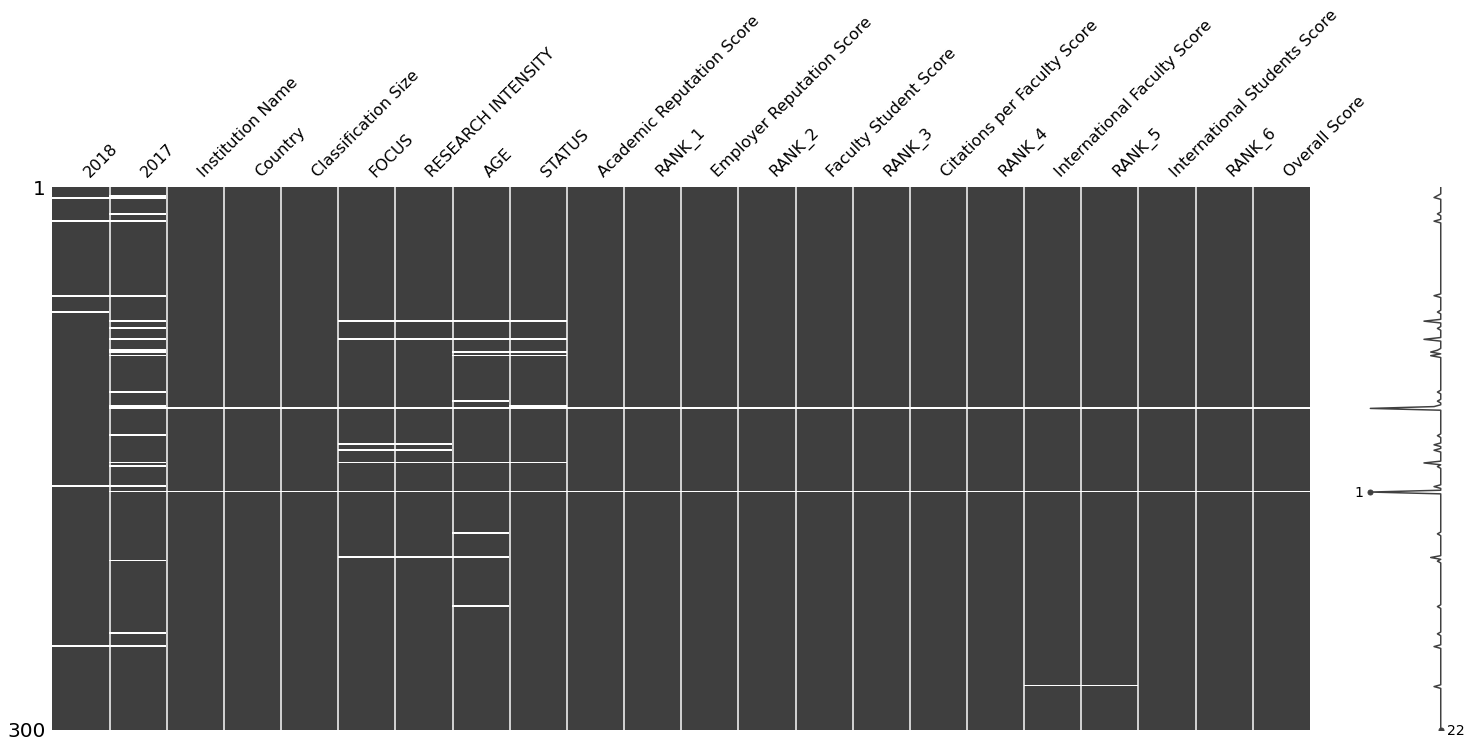

In [9]:
msno.matrix(data18.sample(n=300, random_state=2))

<AxesSubplot:>

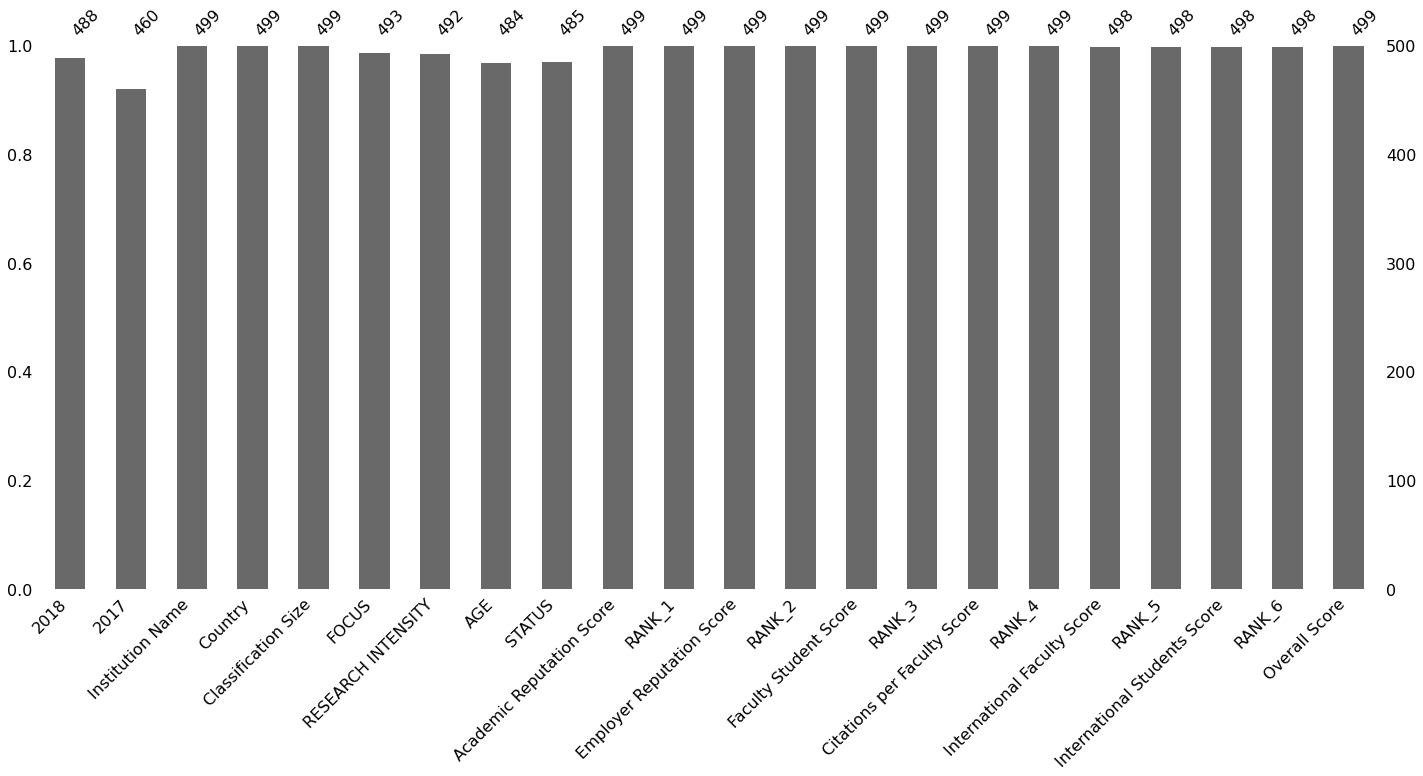

In [10]:
msno.bar(data18.sample(500))

### to get the correlation between missing valuesusing heat map The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

<AxesSubplot:>

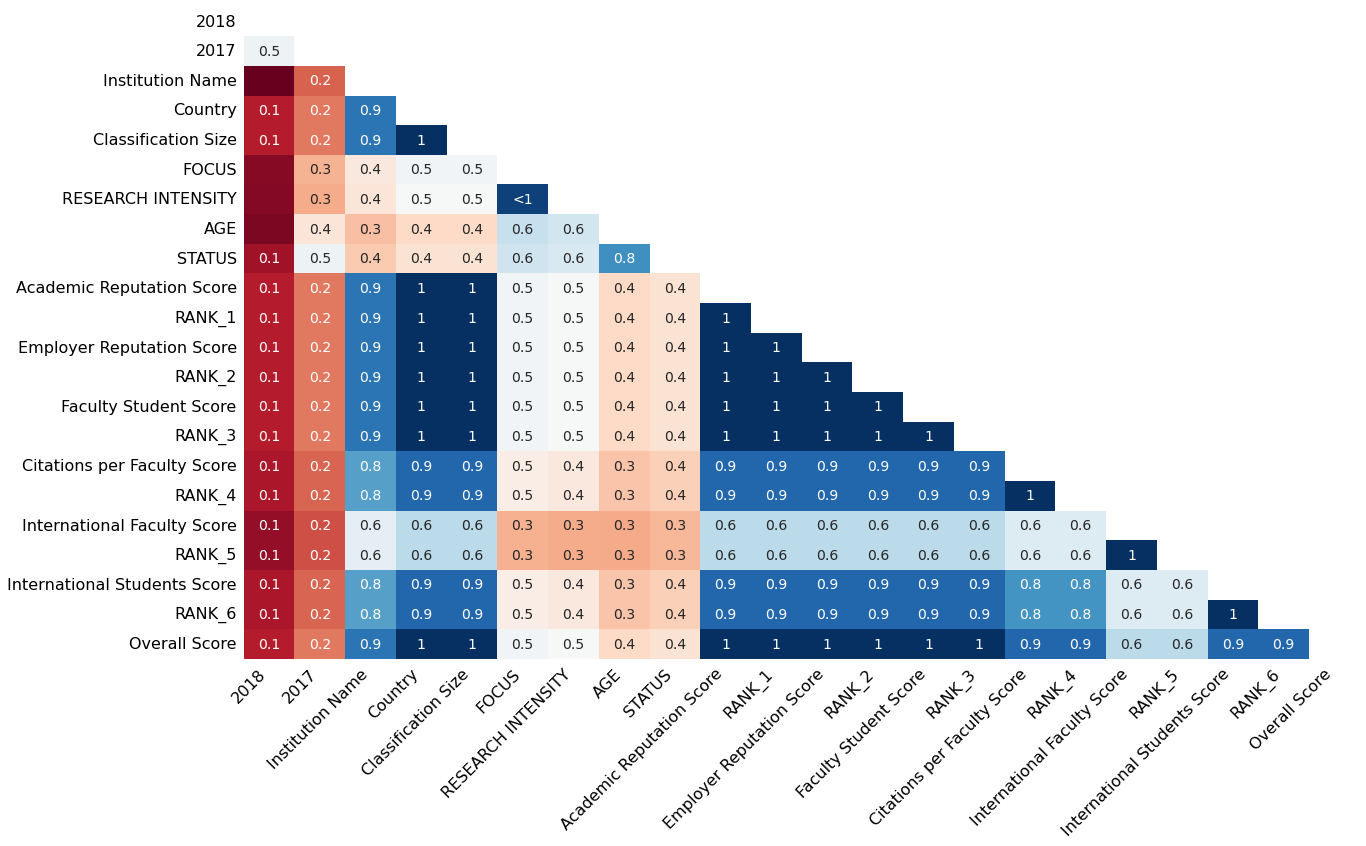

In [11]:
msno.heatmap(data18)

### Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

it can be inferred from the heat map that classification features such as age, status, classification size, research intensity are highly uncorrelated with 0.1 values, that is features appearing or not appearing have no effect on one another
Citations_per_Faculty_RANK, international_faculty_rank, the international students rank is directly correlated to the overall score giving a correlation of 1

## cleaning and arranging the data for exploratory data analysis

## Checking for Null Values in the data

<AxesSubplot:>

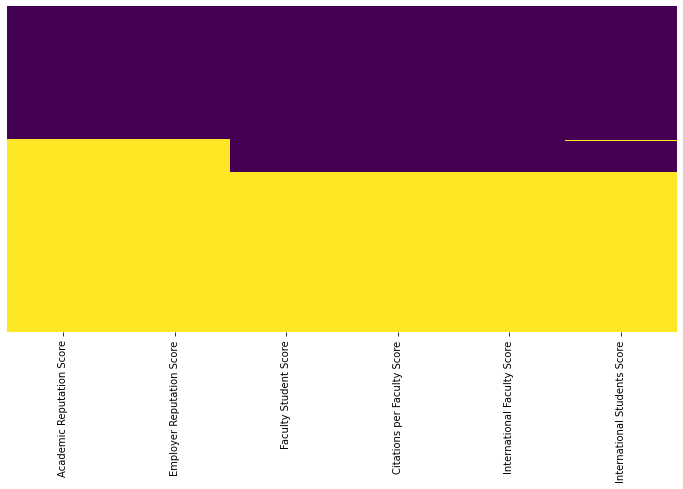

In [12]:
data18.replace('-', np.nan,inplace=True)
# checking null values in 2018 dataset
# yellow color means null value
plt.figure(figsize=(12,6))
sns.heatmap(data18[det_columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)

<AxesSubplot:>

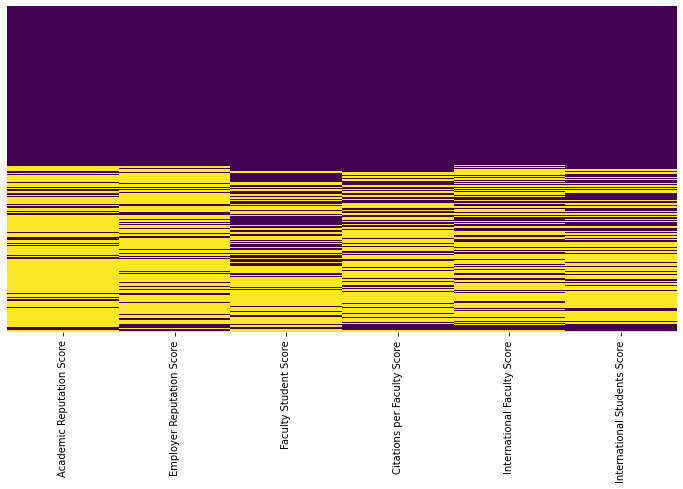

In [13]:
data19.replace('-', np.nan,inplace=True)
# checking null values in 2019 dataset
plt.figure(figsize=(12,6))
sns.heatmap(data19[det_columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)

<AxesSubplot:>

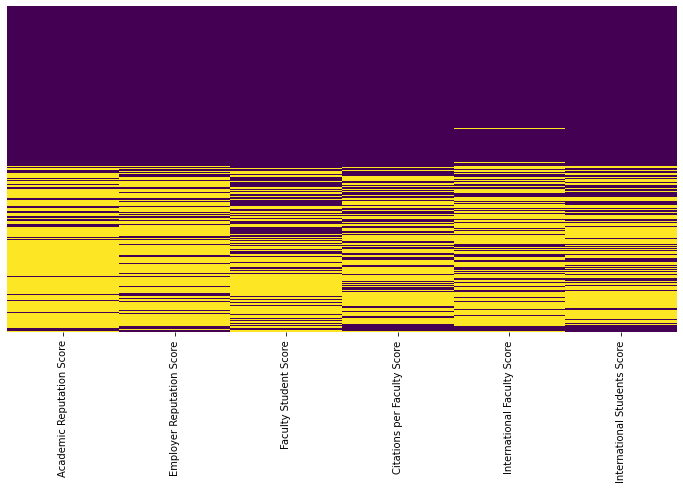

In [14]:
data20.replace('-', np.nan,inplace=True)
# Checking for null values in 2020 data
plt.figure(figsize=(12,6))
sns.heatmap(data20[det_columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)

## Univariant Analysis
### we will majorly make use of charts to illustrate these columns 

In [15]:
data18.Country

0       United States
1       United States
2       United States
3       United States
4      United Kingdom
            ...      
979           Germany
980               NaN
981               NaN
982               NaN
983               NaN
Name: Country, Length: 984, dtype: object

In [16]:
data18.Country.nunique()

84

In [17]:
data19.Country

0        United States
1        United States
2        United States
3        United States
4       United Kingdom
             ...      
1020           Germany
1021               NaN
1022               NaN
1023               NaN
1024               NaN
Name: Country, Length: 1025, dtype: object

In [18]:
data19.Country.nunique()

85

In [19]:
data20.Country

0        United States
1        United States
2        United States
3       United Kingdom
4        United States
             ...      
1019            France
1020     United States
1021    Czech Republic
1022            Israel
1023           Germany
Name: Country, Length: 1024, dtype: object

In [20]:
data20.Country.nunique()

82

In [21]:
top_contries18 = data18.Country.value_counts().head()
top_contries18

United States     159
United Kingdom     78
Germany            47
France             44
Japan              43
Name: Country, dtype: int64

In [22]:
top_contries19 = data19.Country.value_counts().head()
top_contries19

United States     159
United Kingdom     78
Germany            46
Japan              44
France             41
Name: Country, dtype: int64

In [23]:
top_contries20 = data20.Country.value_counts().head()
top_contries20

United States     159
United Kingdom     86
Germany            47
China              42
Japan              41
Name: Country, dtype: int64

C:\Users\user1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


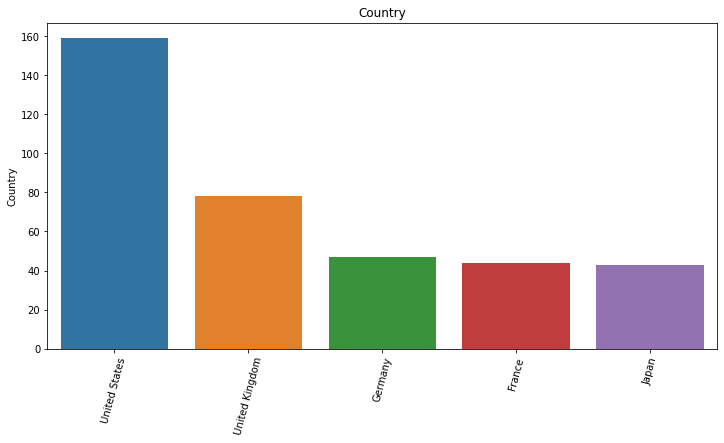

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Country")
sns.barplot(top_contries18.index,top_contries18);

C:\Users\user1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


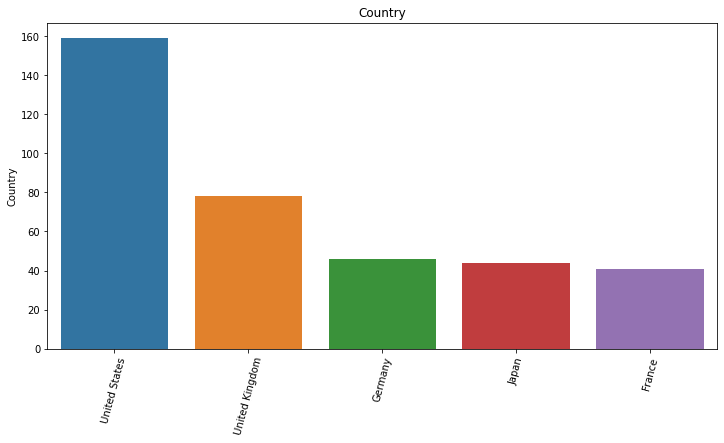

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Country")
sns.barplot(top_contries19.index,top_contries19);

C:\Users\user1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Country'}, ylabel='Country'>

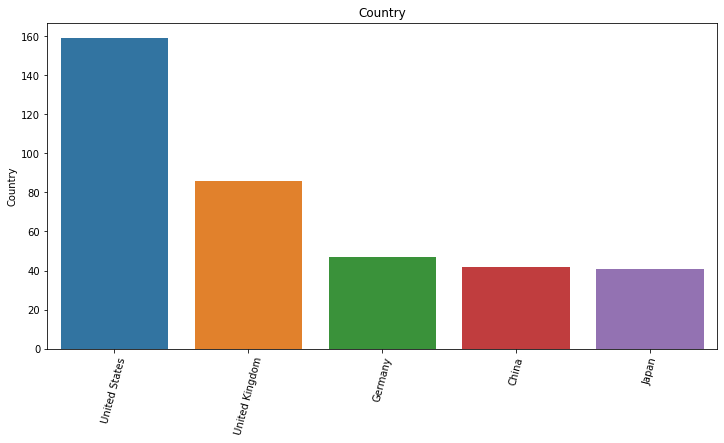

In [26]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Country")
sns.barplot(top_contries20.index,top_contries20)

In [27]:
#columns used for the determination of the rankings will be saved in a variable called det_columns
det_targ_col = ['Institution Name', 'Academic Reputation Score', 'Employer Reputation Score', 'Faculty Student Score',
               'Citations per Faculty Score', 'International Faculty Score', 'International Students Score','Overall Score']

In [28]:
ranking18 = data18[det_targ_col]
ranking19 = data19[det_targ_col]
ranking20 = data20[det_targ_col]

In [29]:
uni_18_clean = ranking18.iloc[0:501]
uni_19_clean = ranking19.iloc[0:1000]
uni_20_clean = ranking20.iloc[0:1002]

In [30]:
uni_18_clean.head(10)

,Institution Name,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Students Score,Overall Score
0,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),100,100,100,99.9,100,96.1,100
1,STANFORD UNIVERSITY,100,100,100,99.4,99.6,72.7,98.7
2,HARVARD UNIVERSITY,100,100,98.3,99.9,96.5,75.2,98.4
3,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),99.5,85.4,100,100,93.4,89.2,97.7
4,UNIVERSITY OF CAMBRIDGE,100,100,100,78.3,97.4,97.7,95.6
5,UNIVERSITY OF OXFORD,100,100,100,76.3,98.6,98.5,95.3
6,UCL (UNIVERSITY COLLEGE LONDON),99.7,99.5,99.1,74.7,96.6,100,94.6
7,IMPERIAL COLLEGE LONDON,99.4,100,100,68.7,100,100,93.7
8,UNIVERSITY OF CHICAGO,99.9,92.9,96.5,85.9,71.9,79.8,93.5
9,ETH ZURICH (SWISS FEDERAL INSTITUTE OF TECHNOL...,99.6,99.4,68.2,98.7,100,98.8,93.3


In [31]:
uni_18_clean.tail(10)

,Institution Name,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Students Score,Overall Score
491,BOGAZIÇI ÜNIVERSITESI,NaN,NaN,5.6,33,19.1,16.5,25.8
492,CZECH TECHNICAL UNIVERSITY IN PRAGUE,NaN,NaN,26,9.5,5.9,42.3,25.7
493,JILIN UNIVERSITY,NaN,NaN,49,20.1,16.7,3.3,25.6
494,KAZAKH NATIONAL PEDAGOGICAL UNIVERSITY ABAI,NaN,NaN,92.6,NaN,19.5,9.4,25.3
495,POLITÉCNICA DE MADRID,NaN,NaN,21.1,10.9,3.2,33.6,25.2
496,PUSAN NATIONAL UNIVERSITY,NaN,NaN,34.7,21.8,8.1,11.1,25.2
497,"UNIVERSIDADE ESTADUAL PAULISTA ""JÚLIO DE MESQU...",NaN,NaN,27.4,10.8,5.9,3.3,25.8
498,UNIVERSITÉ SAINT-JOSEPH DE BEYROUTH,NaN,NaN,70.2,2.2,59.9,9.3,25.6
499,UNIVERSITY OF GUELPH,NaN,NaN,9.5,40.9,46.9,15.5,25.3
500,URAL FEDERAL UNIVERSITY,NaN,NaN,73.5,1.7,13.5,19.2,25.3


In [32]:
uni_19_clean.head(10)

,Institution Name,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Students Score,Overall Score
0,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),100,100,100,99.8,100,95.5,100
1,STANFORD UNIVERSITY,100,100,100,99,99.8,70.5,98.6
2,HARVARD UNIVERSITY,100,100,99.3,99.8,92.1,75.7,98.5
3,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),98.7,81.2,100,100,96.8,90.3,97.2
4,UNIVERSITY OF OXFORD,100,100,100,83,99.6,98.8,96.8
5,UNIVERSITY OF CAMBRIDGE,100,100,100,77.2,99.4,97.9,95.6
6,ETH ZURICH (SWISS FEDERAL INSTITUTE OF TECHNOL...,98.2,96.2,82.4,98.7,100,98.6,95.3
7,IMPERIAL COLLEGE LONDON,98.7,99.9,99.9,67.8,100,100,93.3
8,UNIVERSITY OF CHICAGO,99.6,90.7,97.4,83.6,74.2,82.5,93.2
9,UCL (UNIVERSITY COLLEGE LONDON),99.3,99.2,99.2,66.2,98.7,100,92.9


In [33]:
uni_19_clean.tail(10)

,Institution Name,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Students Score,Overall Score
990,UNIVERSITY TOULOUSE  JEAN JAURÈS,NaN,NaN,NaN,NaN,37.1,53.5,7.2 - 14.2
991,UTAH STATE UNIVERSITY,NaN,NaN,NaN,33.5,NaN,NaN,7.2 - 14.2
992,VELLORE INSTITUTE OF TECHNOLOGY (VIT),NaN,NaN,29.6,NaN,NaN,NaN,7.2 - 14.2
993,VERONA UNIVERSITY,NaN,NaN,NaN,26.4,NaN,NaN,7.2 - 14.2
994,"VIETNAM NATIONAL UNIVERSITY, HANOI",NaN,17.9,25.3,NaN,NaN,NaN,7.2 - 14.2
995,VORONEZH STATE UNIVERSITY,NaN,NaN,40.2,NaN,NaN,18.1,7.2 - 14.2
996,VYTAUTAS MAGNUS UNIVERSITY,NaN,NaN,NaN,NaN,28.1,NaN,7.2 - 14.2
997,WEST UNIVERSITY OF TIMISOARA,NaN,NaN,NaN,NaN,NaN,NaN,7.2 - 14.2
998,WROCLAW UNIVERSITY OF TECHNOLOGY,NaN,17.9,NaN,NaN,NaN,NaN,7.2 - 14.2
999,YEUNGNAM UNIVERSITY,NaN,NaN,NaN,19.1,27.8,NaN,7.2 - 14.2


In [34]:
uni_20_clean.head(10)

,Institution Name,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Students Score,Overall Score
0,Massachusetts Institute of Technology (MIT),100,100,100,99.8,100,94.1,100
1,Stanford University,100,100,100,98.6,99.8,67.7,98.4
2,Harvard University,100,100,98.7,99.6,86.3,62.2,97.4
3,University of Oxford,100,100,100,84.7,99.7,98.5,97.2
4,California Institute of Technology (Caltech),97.8,81.2,100,100,99.4,87.3,96.9
5,ETH Zurich (Swiss Federal Institute of Technol...,98.4,96.7,85,98.4,100,98,95.9
6,University of Cambridge,100,100,100,74.2,100,97.6,95
7,UCL (University College London),99.3,98.7,98.1,76.7,99.1,100,94.8
8,Imperial College London,98.6,99.9,99.8,72.1,100,100,94.1
9,University of Chicago,99.5,93.7,96.5,78.5,70.2,81,92


In [35]:
uni_20_clean.tail(10)

,Institution Name,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Students Score,Overall Score
992,Vellore Institute of Technology (VIT),NaN,NaN,NaN,NaN,NaN,NaN,9 - 14.1
993,Verona University,NaN,NaN,NaN,31,NaN,NaN,9 - 14.1
994,"Vietnam National University, Hanoi",NaN,NaN,NaN,NaN,NaN,NaN,9 - 14.1
995,Voronezh State University,NaN,NaN,37.3,NaN,NaN,16.3,9 - 14.1
996,Vytautas Magnus University,NaN,NaN,NaN,NaN,17.4,NaN,9 - 14.1
997,Warsaw University of Life Sciences,NaN,NaN,28.8,NaN,NaN,NaN,9 - 14.1
998,Wroc?aw University of Science and Technology,NaN,NaN,26.3,NaN,NaN,NaN,9 - 14.1
999,Wuhan University of Technology,NaN,NaN,NaN,18.9,NaN,NaN,9 - 14.1
1000,Xi'an Jiaotong-Liverpool University,NaN,NaN,NaN,NaN,100,NaN,9 - 14.1
1001,Yeungnam University,NaN,NaN,NaN,23.4,21.9,NaN,9 - 14.1


### Institute Age 5: Historic (>100 years old) 4: Mature (50-100 years old) 3: Established (25-50 years old) 2: Young (10-25 years old) 1: New (<10

(array([  1.,   0.,  31.,   0.,   0., 127.,   0., 304.,   0., 496.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

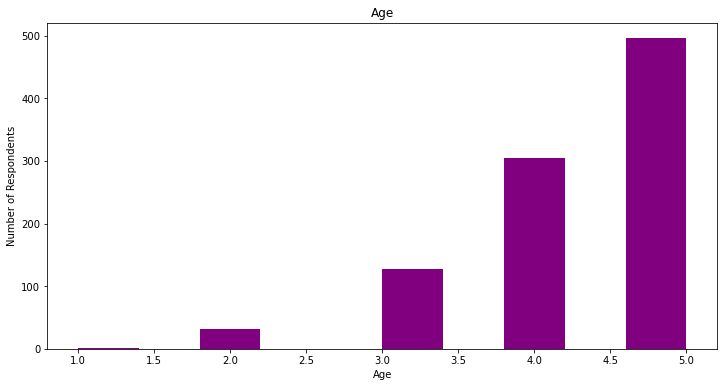

In [36]:
plt.figure(figsize=(12,6))
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Number of Respondents")
plt.hist(data18.AGE,bins=10,color='purple')

(array([  8.,   0.,  38.,   0.,   0., 158.,   0., 324.,   0., 493.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

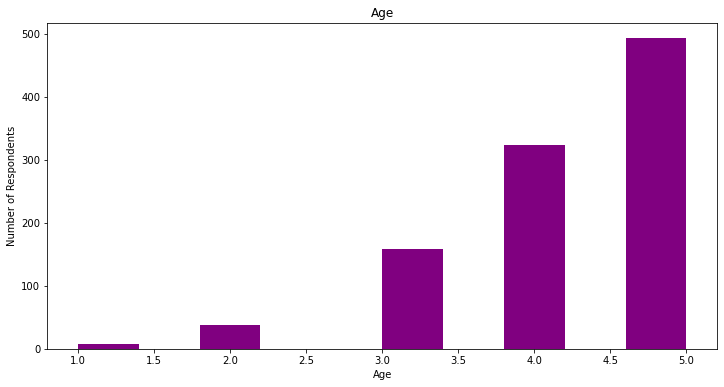

In [37]:
plt.figure(figsize=(12,6))
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Number of Respondents")
plt.hist(data19.AGE,bins=10,color='purple')

(array([ 17.,   0.,  38.,   0.,   0., 151.,   0., 306.,   0., 489.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

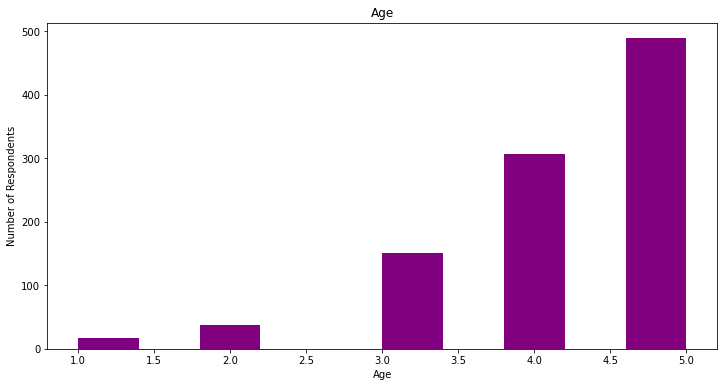

In [38]:
plt.figure(figsize=(12,6))
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Number of Respondents")
plt.hist(data20.AGE,bins=10,color='purple')

## Cleaning up our data for multivariant analysis and modelling

In [39]:
university_ranking18 = pd.read_csv('2018-QS-World-University-Rankings.csv',
                                   encoding='latin-1', header = [0,1])
university_ranking19 = pd.read_csv('2019-QS-World-University-Rankings.csv',
                                   encoding='latin-1', header = [0,1])
university_ranking20 = pd.read_csv('2020-QS-World-University-Rankings.csv',
                                   encoding='latin-1', header = [0,1])

In [40]:
columns=['Academic Reputation Score', 'Employer Reputation Score', 'Faculty Student Score',
        'Citations per Faculty Score', 'International Faculty Score', 'International Students Score','Overall Score']

#### looking at our data sets, some rows have incomplete predictors and no target too. so we need to drop these rows taking into consideration just the predictor.

In [41]:
university_ranking18 = university_ranking18.iloc[:501]
university_ranking19 = university_ranking19.iloc[:1000]
university_ranking20 = university_ranking20.iloc[:1002]

In [42]:
def avg(data):
    df = pd.DataFrame(data=data)    
    row_num = df.shape[0]
    for row in range(row_num):
        num=df.iloc[row]
        num = str(num)
        if '-' in num:
            if len(num) > 50:
                num = num[23:]
                num = num.strip('dtype: object')
                num = num.split()
                val1 = float(str(num[0]))
                val2 = float(str(num[2]))
                val = (val1 + val2)/ 2
                val = round(val, 1)
                n = num[-1:][0]
                n = n.strip(',')
                n = int(n)
                ans = '{} {}'.format(val, n)
                df.iloc[n] = val
                # print((ans))
    return df

In [43]:
score = university_ranking19['Overall Score']
cg = score.iloc[640:646]
cg.head()
score = avg(score)
cg = score.iloc[640:646]
cg.head()

,Unnamed: 21_level_1
640,19.4
641,19.4
642,19.4
643,19.4
644,19.4


In [44]:
cleaned_Target_2018 = avg(university_ranking18['Overall Score'])
cleaned_Target_2019 = avg(university_ranking19['Overall Score'])
cleaned_Target_2020 = avg(university_ranking20['Overall Score'])
cleaned_Target_2020

,Unnamed: 21_level_1
0,100
1,98.4
2,97.4
3,97.2
4,96.9
...,...
997,11.6
998,11.6
999,11.6
1000,11.6


In [45]:
# Resolving columns
def resolve_columns(df: pd.core.frame.DataFrame) -> list:
    cols = []
    rankNumber = 1
    for column in df:
        if column[0].startswith('Unnamed'):
            if column[1].startswith('RANK'):
                cols.append(column[1] + '_' + str(rankNumber))
                rankNumber +=1
            else:
                cols.append(column[1])
        elif column[1].startswith('Unnamed'):
            if column[0].startswith('RANK'):
                cols.append(column[0] + '_' + str(rankNumber))
                rankNumber +=1
            else:
                cols.append(column[0])
        else:
            cols.append(column[0] + ' ' + column[1].capitalize())
    return cols

In [46]:
university_ranking18.columns = resolve_columns(university_ranking18)
university_ranking19.columns = resolve_columns(university_ranking19)
university_ranking20.columns = resolve_columns(university_ranking20)
university_ranking18.columns

Index(['2018', '2017', 'Institution Name', 'Country', 'Classification Size',
       'FOCUS', 'RESEARCH INTENSITY', 'AGE', 'STATUS',
       'Academic Reputation Score', 'RANK_1', 'Employer Reputation Score',
       'RANK_2', 'Faculty Student Score', 'RANK_3',
       'Citations per Faculty Score', 'RANK_4', 'International Faculty Score',
       'RANK_5', 'International Students Score', 'RANK_6', 'Overall Score'],
      dtype='object')

## multivariant analysis
### Here, we will be looking at the correlation between the predictors and the target and also among the predictors themselves

In [47]:
columns=['Academic Reputation Score', 'Employer Reputation Score', 'Faculty Student Score',
        'Citations per Faculty Score', 'International Faculty Score', 'International Students Score','Overall Score']

#### lets covert our datas to float

### since the datasets are similar and have the same characteristics, we will be using 2018 data to study the correlations between the features and the target

In [48]:
data_18 = data18[columns].astype(float)
# data_19= data19[columns].astype(float)
# data_20 = data20[columns].astype(float)

Text(0.5, 1.0, 'Correlation heatmap')

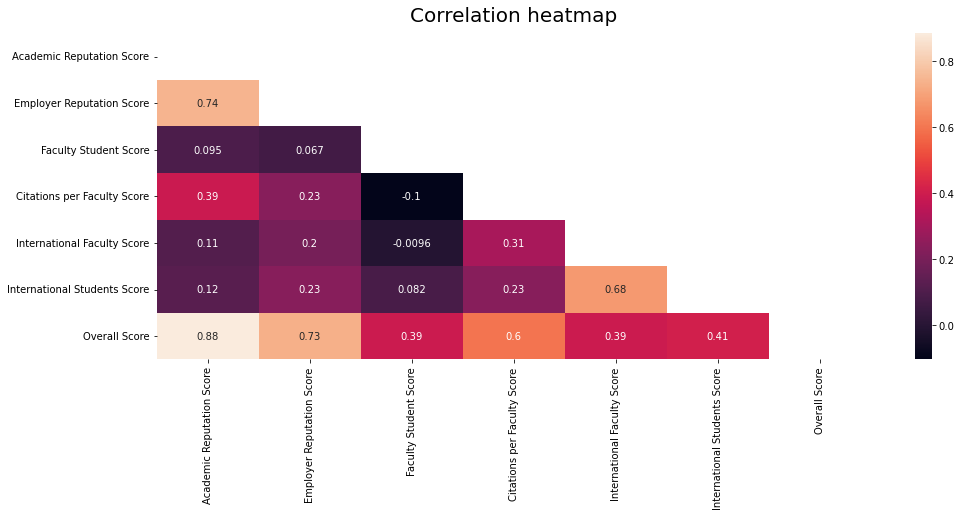

In [49]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(data_18.corr(), dtype=bool))
heatmap=sns.heatmap(data_18.corr(),mask=mask,annot=True)
heatmap.set_title('Correlation heatmap',fontdict={'fontsize':20}, pad=12)

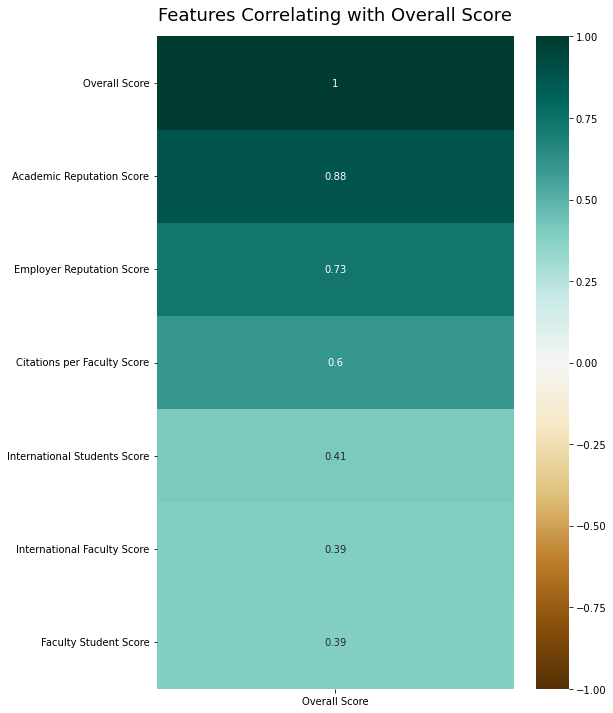

In [50]:
plt.figure(figsize=(8, 12))
corr=data_18.corr()[['Overall Score']].sort_values(by='Overall Score', ascending=False)
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Overall Score', fontdict={'fontsize':18}, pad=16);

### trying to get the impacts of each of the predictors on the target, and representing same on Pie chart

In [51]:
corr.reset_index(inplace=True)
corr.columns=['Feature','Correlation']
corr.drop(labels=0,axis=0,inplace=True)

([<matplotlib.patches.Wedge at 0x1ecec94a430>,
 [Text(0.7531154230741893, 0.8017587913629542, 'Academic Rep.'),
  Text(-0.7394598624619964, 0.8143703775357288, 'Employer Rep.'),
  Text(-1.0162278127201891, -0.4210475420352677, 'Citations per Faculty'),
  Text(-0.2721272557451732, -1.0658080299381316, 'Intl. Students'),
  Text(0.5156384673693891, -0.971656817486991, 'Intl. Faculty'),
  Text(1.0292215877121966, -0.38820474415852446, 'Faculty Student')],
 [Text(0.4107902307677396, 0.4373229771070659, '26%'),
  Text(-0.4033417431610889, 0.4442020241103975, '21%'),
  Text(-0.5543060796655576, -0.22966229565560053, '18%'),
  Text(-0.14843304858827627, -0.5813498345117081, '12%'),
  Text(0.28125734583784856, -0.5299946277201768, '12%'),
  Text(0.5613935932975618, -0.21174804226828606, '11%')])

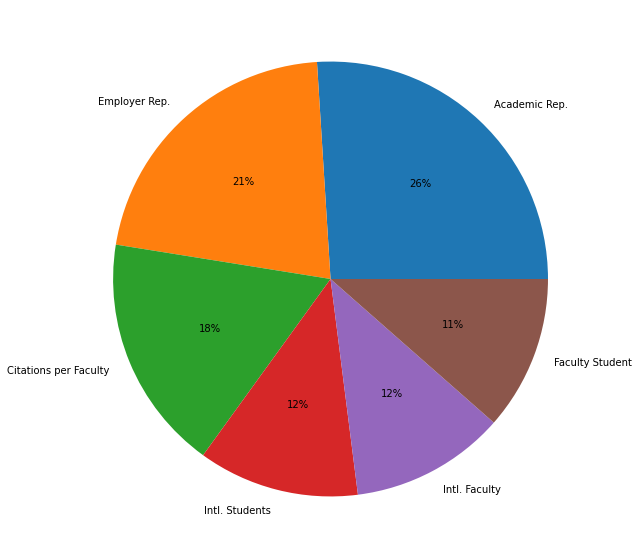

In [52]:
corr['Percentage Explained']=corr['Correlation']*100/sum(corr['Correlation'])
plt.figure(figsize=(12,10))
labels=['Academic Rep.','Employer Rep.','Citations per Faculty','Intl. Students','Intl. Faculty','Faculty Student']
plt.pie(corr['Percentage Explained'],labels=labels,data=corr,autopct='%.0f%%')

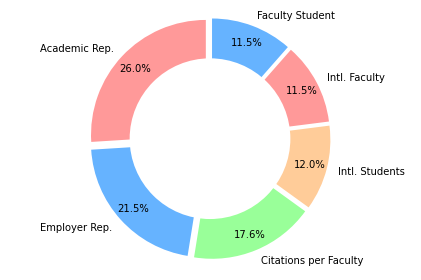

In [53]:
fig,ax1=plt.subplots()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(corr['Percentage Explained'], colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [54]:
graph_data=data_18.copy()
graph_data['Country']=university_ranking18['Country']
graph_data['Classification Size']=university_ranking18['Classification Size']
graph_data['Focus']=university_ranking18['FOCUS']
graph_data['Research Intensity']=university_ranking18['RESEARCH INTENSITY']
graph_data['Status']=university_ranking18['STATUS']

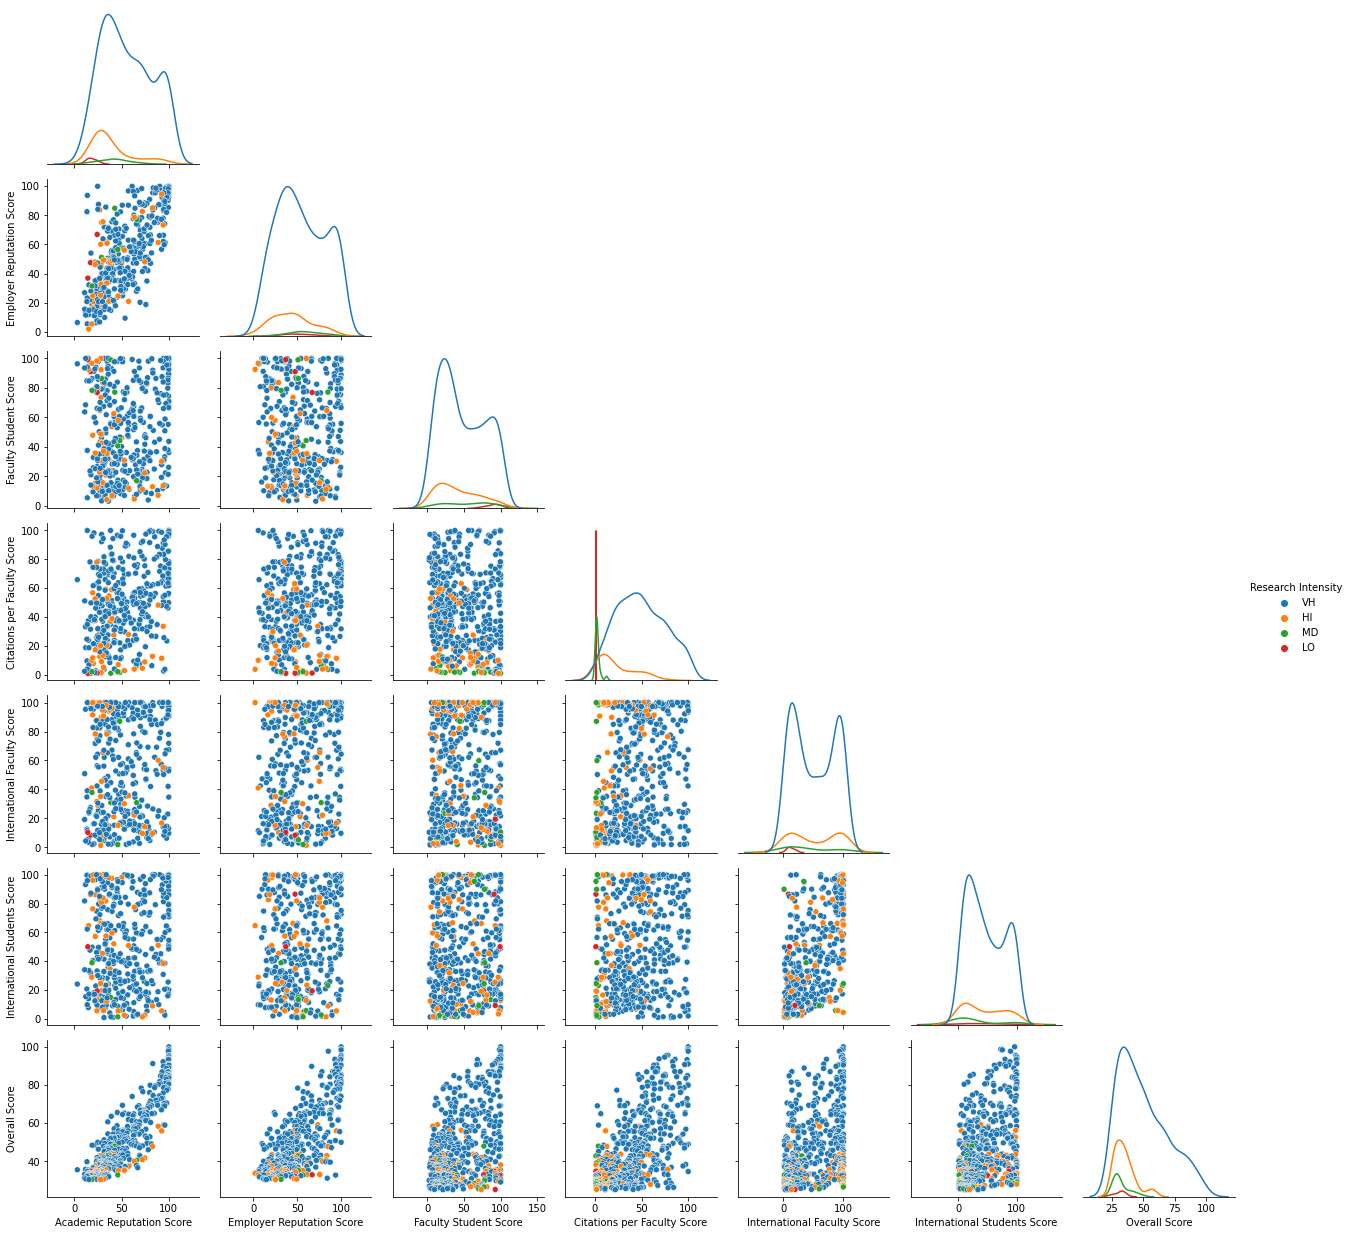

In [55]:
g=sns.PairGrid(graph_data,diag_sharey=False, corner=True,hue='Research Intensity')
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.add_legend()

**FINDINGS :-**
1. From the pie plot we can see that almost 50% of overall score is defined by two variables- Academic Reputation and Employer Reputation score.

2. Most of the colleges provide Very High Research Intensity follwed by High Intensity universities.

3. Academic Reputation and Employer Reputation Score are almost linearly related with Overall Score, while for other variables, the plots are almost uniformly distributed.

4. Most of the colleges have Status A follwed by B and then C

# model training


In [56]:
data18 = university_ranking18.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
data19 = university_ranking19.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
data20 = university_ranking20.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()

In [57]:
data18.dropna(inplace=True)
data19.dropna(inplace=True)
data20.dropna(inplace=True)


In [58]:
features18 = data18[det_columns]
features19 = data19[det_columns]
features20 = data20[det_columns]

In [59]:
feature_data = pd.concat([features18, features19, features20])
target_data = pd.concat([cleaned_Target_2018, cleaned_Target_2019, cleaned_Target_2020])

X = np.array(feature_data.values)
y = np.array(target_data.values)


x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2)

In [60]:
best_accuracy = 0
least_acc = 1
for w in range(10000):
    rs = randint(1, 500)
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X, y, test_size=0.2, random_state=rs)

    model = LinearRegression()

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    acc = model.score(x_test, y_test)  # acc stands for accuracy
    print("Accuracy: " + str(acc))
    if acc > best_accuracy:
        best_accuracy = acc
        with open("university_score", 'wb') as f:
            pickle.dump(model, f)
    else:
        if acc< least_acc:
            least_acc = acc
            
            

pickle_in = open("university_score", "rb")
model = pickle.load(pickle_in)

Accuracy: 0.9789186743408574
Accuracy: 0.9795189548154404
Accuracy: 0.980150436365179
Accuracy: 0.9838332245206671
Accuracy: 0.978440227215704
Accuracy: 0.9794590806952606
Accuracy: 0.9772554281101875
Accuracy: 0.9785498345292734
Accuracy: 0.9818677787087015
Accuracy: 0.9808839375096716
Accuracy: 0.9777955040872056
Accuracy: 0.9782164614034058
Accuracy: 0.9811205152033138
Accuracy: 0.975133662246481
Accuracy: 0.9800833917932625
Accuracy: 0.9772052298928716
Accuracy: 0.9798119417173414
Accuracy: 0.9783138082987031
Accuracy: 0.9707000376256558
Accuracy: 0.9790144863801433
Accuracy: 0.97941765394198
Accuracy: 0.9767641355683496
Accuracy: 0.9809167180984765
Accuracy: 0.9759597502949994
Accuracy: 0.9731741997160116
Accuracy: 0.9769154534370179
Accuracy: 0.9797295600466941
Accuracy: 0.9800833917932625
Accuracy: 0.9804255694945143
Accuracy: 0.9778771038686824
Accuracy: 0.9805169451956255
Accuracy: 0.9777065752315108
Accuracy: 0.9776776469038937
Accuracy: 0.9782216371871643
Accuracy: 0.9803223

Accuracy: 0.9784230608471335
Accuracy: 0.9769504524445964
Accuracy: 0.9769154534370179
Accuracy: 0.9818266169815049
Accuracy: 0.9773908294803018
Accuracy: 0.9825294411414202
Accuracy: 0.9774527549654131
Accuracy: 0.9736311252915426
Accuracy: 0.9743306943527945
Accuracy: 0.9773146240201296
Accuracy: 0.981646162520491
Accuracy: 0.9807808794241731
Accuracy: 0.9773146240201296
Accuracy: 0.9830243227252332
Accuracy: 0.9783902909946277
Accuracy: 0.9833732864878099
Accuracy: 0.9754495271368077
Accuracy: 0.9795259366172512
Accuracy: 0.975729668341408
Accuracy: 0.9822978201655406
Accuracy: 0.9782161352274846
Accuracy: 0.97717355201373
Accuracy: 0.9784936191074833
Accuracy: 0.9757202894909829
Accuracy: 0.9779546098613751
Accuracy: 0.9768917850444454
Accuracy: 0.9790963267007216
Accuracy: 0.9781728621582175
Accuracy: 0.9775367373937968
Accuracy: 0.9760710527597825
Accuracy: 0.9792998021915551
Accuracy: 0.9810121149869314
Accuracy: 0.9807169170557216
Accuracy: 0.9818208814955981
Accuracy: 0.974676

Accuracy: 0.9821069530996387
Accuracy: 0.981599545426528
Accuracy: 0.9784212104355151
Accuracy: 0.9823717284106419
Accuracy: 0.9777639236597107
Accuracy: 0.981128839044049
Accuracy: 0.9816220871590859
Accuracy: 0.9796012022161721
Accuracy: 0.9787659471891437
Accuracy: 0.9831969731518123
Accuracy: 0.9769113229230926
Accuracy: 0.9788912389828024
Accuracy: 0.9798200731648834
Accuracy: 0.9785361009823029
Accuracy: 0.9760653546513673
Accuracy: 0.9756591918368899
Accuracy: 0.9789846191019806
Accuracy: 0.9838332245206671
Accuracy: 0.977188190654305
Accuracy: 0.9800181874973672
Accuracy: 0.9730037866517962
Accuracy: 0.9769113229230926
Accuracy: 0.9792347145444852
Accuracy: 0.9779103506564947
Accuracy: 0.9746768750825626
Accuracy: 0.9752932133329157
Accuracy: 0.9780139776387317
Accuracy: 0.9794332318297388
Accuracy: 0.978787910671845
Accuracy: 0.9757202894909829
Accuracy: 0.971987286733067
Accuracy: 0.9755808759549632
Accuracy: 0.9819360932070516
Accuracy: 0.9817393571145492
Accuracy: 0.9789426

Accuracy: 0.9831698274580144
Accuracy: 0.9782378838980559
Accuracy: 0.9774527549654131
Accuracy: 0.9809520854805154
Accuracy: 0.9829955008911259
Accuracy: 0.978011006856459
Accuracy: 0.9775005391010055
Accuracy: 0.9818004480389698
Accuracy: 0.9794812399021615
Accuracy: 0.9783432904733887
Accuracy: 0.9745997878059813
Accuracy: 0.9802523607434303
Accuracy: 0.9811358171340567
Accuracy: 0.982464175553339
Accuracy: 0.9785933653454991
Accuracy: 0.982464175553339
Accuracy: 0.9782497472736261
Accuracy: 0.9802947212495694
Accuracy: 0.9772554281101875
Accuracy: 0.9771964468902911
Accuracy: 0.9735303458538439
Accuracy: 0.9787724349930232
Accuracy: 0.974167781032014
Accuracy: 0.9783876638566313
Accuracy: 0.9780123790916181
Accuracy: 0.9787756481060448
Accuracy: 0.9769306784849962
Accuracy: 0.9739769683149403
Accuracy: 0.9760653546513673
Accuracy: 0.9808536197263417
Accuracy: 0.9773146240201296
Accuracy: 0.9785361009823029
Accuracy: 0.9764240573549966
Accuracy: 0.9763334265410254
Accuracy: 0.975974

Accuracy: 0.9770760311401262
Accuracy: 0.979155320161525
Accuracy: 0.9777065752315108
Accuracy: 0.9795960040394415
Accuracy: 0.9788485494878528
Accuracy: 0.9819507927716151
Accuracy: 0.981646162520491
Accuracy: 0.9738040108629624
Accuracy: 0.9766722792781851
Accuracy: 0.9785966022258153
Accuracy: 0.9772089168391161
Accuracy: 0.9795701156074972
Accuracy: 0.97941765394198
Accuracy: 0.9708903731904804
Accuracy: 0.9816707231422458
Accuracy: 0.9795331633407397
Accuracy: 0.9806678018143711
Accuracy: 0.9753991381609961
Accuracy: 0.9795301645104106
Accuracy: 0.9730037866517962
Accuracy: 0.975962151260118
Accuracy: 0.9779595810755792
Accuracy: 0.9790008053210898
Accuracy: 0.9795189548154404
Accuracy: 0.9810608014427631
Accuracy: 0.978787910671845
Accuracy: 0.9790666920606852
Accuracy: 0.981599545426528
Accuracy: 0.9766715938173548
Accuracy: 0.9787659471891437
Accuracy: 0.9787659471891437
Accuracy: 0.9769929247689939
Accuracy: 0.9759630244539133
Accuracy: 0.9818208814955981
Accuracy: 0.979468258

Accuracy: 0.9817393571145492
Accuracy: 0.9833003063816136
Accuracy: 0.9782187930982196
Accuracy: 0.9768011870000398
Accuracy: 0.9788330748003824
Accuracy: 0.9762358805829032
Accuracy: 0.9759298489496985
Accuracy: 0.9766853460019546
Accuracy: 0.9818102371640118
Accuracy: 0.9780139776387317
Accuracy: 0.9785029298777569
Accuracy: 0.9833732864878099
Accuracy: 0.9789846191019806
Accuracy: 0.9781695421790793
Accuracy: 0.9825261382902583
Accuracy: 0.978787910671845
Accuracy: 0.9792172758141532
Accuracy: 0.9816980947074954
Accuracy: 0.9757202894909829
Accuracy: 0.980474631137893
Accuracy: 0.9796012022161721
Accuracy: 0.9755853934827426
Accuracy: 0.9791006444831369
Accuracy: 0.981599545426528
Accuracy: 0.9813844089942483
Accuracy: 0.9802947212495694
Accuracy: 0.9777955040872056
Accuracy: 0.9766054391528877
Accuracy: 0.9776917056273676
Accuracy: 0.9783976533401603
Accuracy: 0.9809167180984765
Accuracy: 0.977044178538454
Accuracy: 0.977653064324421
Accuracy: 0.9793872859616817
Accuracy: 0.9788874

Accuracy: 0.9770760311401262
Accuracy: 0.9796843416033654
Accuracy: 0.980373829503012
Accuracy: 0.9792998021915551
Accuracy: 0.9789151761226326
Accuracy: 0.979586648726377
Accuracy: 0.9710924267108401
Accuracy: 0.975377518403554
Accuracy: 0.9739470571657284
Accuracy: 0.9796513135813133
Accuracy: 0.9784936191074833
Accuracy: 0.9783976533401603
Accuracy: 0.9782164614034058
Accuracy: 0.9792347145444852
Accuracy: 0.9829386670035707
Accuracy: 0.9791006444831369
Accuracy: 0.9777639236597107
Accuracy: 0.9804066900343252
Accuracy: 0.9788330748003824
Accuracy: 0.9797630774797097
Accuracy: 0.9767351678126805
Accuracy: 0.9813538360251567
Accuracy: 0.9766212873311354
Accuracy: 0.9807862522421574
Accuracy: 0.9814837108113561
Accuracy: 0.9782497472736261
Accuracy: 0.9784943950846423
Accuracy: 0.9782164614034058
Accuracy: 0.9758452862333794
Accuracy: 0.9822978201655406
Accuracy: 0.9830510770660025
Accuracy: 0.971912801608982
Accuracy: 0.979468258727968
Accuracy: 0.9804692420688136
Accuracy: 0.9755962

Accuracy: 0.9816707231422458
Accuracy: 0.9772089168391161
Accuracy: 0.9783093451777218
Accuracy: 0.9759204055020697
Accuracy: 0.9809911582740547
Accuracy: 0.9822934379562726
Accuracy: 0.9775700507913425
Accuracy: 0.9775469052590935
Accuracy: 0.9782192059561815
Accuracy: 0.981646162520491
Accuracy: 0.9817418400813849
Accuracy: 0.9806678018143711
Accuracy: 0.9818208814955981
Accuracy: 0.9796386364236227
Accuracy: 0.9749456571477051
Accuracy: 0.9793293385050812
Accuracy: 0.9796012022161721
Accuracy: 0.9772052298928716
Accuracy: 0.9821665545418682
Accuracy: 0.9791098525683413
Accuracy: 0.9769479657897419
Accuracy: 0.9759204055020697
Accuracy: 0.9744155482724275
Accuracy: 0.9790666920606852
Accuracy: 0.9795897620424414
Accuracy: 0.9830243227252332
Accuracy: 0.9776917056273676
Accuracy: 0.9770670918754286
Accuracy: 0.9781695421790793
Accuracy: 0.9761210690799259
Accuracy: 0.9790290979431157
Accuracy: 0.9806678018143711
Accuracy: 0.9802924769151716
Accuracy: 0.9810608014427631
Accuracy: 0.981

Accuracy: 0.9807808794241731
Accuracy: 0.9775005391010055
Accuracy: 0.9797244082665175
Accuracy: 0.9773908294803018
Accuracy: 0.9808904419989793
Accuracy: 0.9789846191019806
Accuracy: 0.9775469052590935
Accuracy: 0.9800120904704157
Accuracy: 0.9799307452281982
Accuracy: 0.9761741006840863
Accuracy: 0.9784082892638757
Accuracy: 0.9773146240201296
Accuracy: 0.9773234331738706
Accuracy: 0.977653064324421
Accuracy: 0.9811344022415843
Accuracy: 0.97598285862481
Accuracy: 0.9790709378983873
Accuracy: 0.9749012952543568
Accuracy: 0.9758337359140662
Accuracy: 0.9769179922361184
Accuracy: 0.981342041073412
Accuracy: 0.9787178118694282
Accuracy: 0.9838332245206671
Accuracy: 0.9789862785231538
Accuracy: 0.9807169170557216
Accuracy: 0.9795259366172512
Accuracy: 0.9810400155946957
Accuracy: 0.975133662246481
Accuracy: 0.974846609710792
Accuracy: 0.9813844089942483
Accuracy: 0.9767675353040948
Accuracy: 0.975377518403554
Accuracy: 0.9819507927716151
Accuracy: 0.9803911793442981
Accuracy: 0.979199901

Accuracy: 0.9779595810755792
Accuracy: 0.971987286733067
Accuracy: 0.9768011870000398
Accuracy: 0.9776776469038937
Accuracy: 0.9777250212851251
Accuracy: 0.974167781032014
Accuracy: 0.9772089168391161
Accuracy: 0.9783876638566313
Accuracy: 0.9782355608060784
Accuracy: 0.9758337359140662
Accuracy: 0.9805622184428534
Accuracy: 0.975729668341408
Accuracy: 0.9777639236597107
Accuracy: 0.9802657228228158
Accuracy: 0.9732710312970487
Accuracy: 0.9797040541811901
Accuracy: 0.981599545426528
Accuracy: 0.9803496817332062
Accuracy: 0.9810586677893558
Accuracy: 0.9746917885918551
Accuracy: 0.9769179922361184
Accuracy: 0.9792205401133772
Accuracy: 0.9829386670035707
Accuracy: 0.9818004480389698
Accuracy: 0.9797630774797097
Accuracy: 0.9796843416033654
Accuracy: 0.978533797573074
Accuracy: 0.9754703503661364
Accuracy: 0.9796028601277685
Accuracy: 0.9760305124508339
Accuracy: 0.9813325729440403
Accuracy: 0.9806132854205674
Accuracy: 0.9838332245206671
Accuracy: 0.976554265993718
Accuracy: 0.98025236

Accuracy: 0.9731741997160116
Accuracy: 0.9746943322442277
Accuracy: 0.9766054391528877
Accuracy: 0.9785820479722144
Accuracy: 0.9783573885761374
Accuracy: 0.9782192059561815
Accuracy: 0.9790144863801433
Accuracy: 0.9796513135813133
Accuracy: 0.97941765394198
Accuracy: 0.9803724681341133
Accuracy: 0.9792803684188388
Accuracy: 0.9793872859616817
Accuracy: 0.9768361769461869
Accuracy: 0.978669727617436
Accuracy: 0.9788874832321066
Accuracy: 0.9807625082343512
Accuracy: 0.9800257989610793
Accuracy: 0.9801088929469027
Accuracy: 0.9769806367916275
Accuracy: 0.9775469052590935
Accuracy: 0.9810400155946957
Accuracy: 0.980373829503012
Accuracy: 0.9782187930982196
Accuracy: 0.9783876638566313
Accuracy: 0.979181198699247
Accuracy: 0.9802121149126591
Accuracy: 0.9819360932070516
Accuracy: 0.9784212104355151
Accuracy: 0.9767351678126805
Accuracy: 0.9769306784849962
Accuracy: 0.9790441011038323
Accuracy: 0.9757888911427395
Accuracy: 0.9768361769461869
Accuracy: 0.9789186743408574
Accuracy: 0.9783138

Accuracy: 0.9788533044546966
Accuracy: 0.9783138082987031
Accuracy: 0.9822978201655406
Accuracy: 0.975133662246481
Accuracy: 0.9784029941474075
Accuracy: 0.9760088080012094
Accuracy: 0.9806998852835953
Accuracy: 0.9813325729440403
Accuracy: 0.9769479657897419
Accuracy: 0.9763032158331647
Accuracy: 0.9787178118694282
Accuracy: 0.9784936191074833
Accuracy: 0.9796179267191056
Accuracy: 0.9809167180984765
Accuracy: 0.9795835753898054
Accuracy: 0.9788485494878528
Accuracy: 0.9806998852835953
Accuracy: 0.9804255694945143
Accuracy: 0.9707000376256558
Accuracy: 0.982612541146466
Accuracy: 0.9739470571657284
Accuracy: 0.9800120904704157
Accuracy: 0.9768361769461869
Accuracy: 0.9779915563109898
Accuracy: 0.9773890517886211
Accuracy: 0.9805411340412858
Accuracy: 0.9800833917932625
Accuracy: 0.9796537250228132
Accuracy: 0.981599545426528
Accuracy: 0.9833003063816136
Accuracy: 0.9766764043153444
Accuracy: 0.978793879098848
Accuracy: 0.9782187930982196
Accuracy: 0.9750476461592066
Accuracy: 0.979596

Accuracy: 0.9803911793442981
Accuracy: 0.9791999015827726
Accuracy: 0.9792205401133772
Accuracy: 0.9787849481781927
Accuracy: 0.9794332318297388
Accuracy: 0.9805698180452368
Accuracy: 0.9813325729440403
Accuracy: 0.9782218896703077
Accuracy: 0.9807862522421574
Accuracy: 0.979530133778378
Accuracy: 0.9782355608060784
Accuracy: 0.9805539697584527
Accuracy: 0.9777250212851251
Accuracy: 0.9749910436831839
Accuracy: 0.9800726908883589
Accuracy: 0.9818677787087015
Accuracy: 0.9815440972936886
Accuracy: 0.9784230608471335
Accuracy: 0.9768743795834651
Accuracy: 0.9784943950846423
Accuracy: 0.9805622184428534
Accuracy: 0.979495552551262
Accuracy: 0.9818004480389698
Accuracy: 0.9759630244539133
Accuracy: 0.977653064324421
Accuracy: 0.9726353289437457
Accuracy: 0.9820931122975158
Accuracy: 0.9784106165985352
Accuracy: 0.9807862522421574
Accuracy: 0.978787910671845
Accuracy: 0.9785933653454991
Accuracy: 0.9735303458538439
Accuracy: 0.9771231224345756
Accuracy: 0.982464175553339
Accuracy: 0.9688315

Accuracy: 0.981646162520491
Accuracy: 0.9757963432929104
Accuracy: 0.9785820479722144
Accuracy: 0.9786682252542956
Accuracy: 0.975377518403554
Accuracy: 0.9778771038686824
Accuracy: 0.9796537250228132
Accuracy: 0.9782255572075421
Accuracy: 0.9797769419753599
Accuracy: 0.9818544713347697
Accuracy: 0.9818266169815049
Accuracy: 0.9788533044546966
Accuracy: 0.9829386670035707
Accuracy: 0.9774527549654131
Accuracy: 0.9789846191019806
Accuracy: 0.9802523543377526
Accuracy: 0.9798550225731333
Accuracy: 0.9788070868653036
Accuracy: 0.9804255694945143
Accuracy: 0.9791006444831369
Accuracy: 0.9791999015827726
Accuracy: 0.9760268597863457
Accuracy: 0.9758337359140662
Accuracy: 0.9820894544089375
Accuracy: 0.981599545426528
Accuracy: 0.9789163650761377
Accuracy: 0.9775469052590935
Accuracy: 0.9808208706043372
Accuracy: 0.9809659639568646
Accuracy: 0.9783138082987031
Accuracy: 0.9778326873097583
Accuracy: 0.9790059452902474
Accuracy: 0.979181198699247
Accuracy: 0.9735993629026412
Accuracy: 0.976410

Accuracy: 0.9782465267809775
Accuracy: 0.9813844089942483
Accuracy: 0.9811205152033138
Accuracy: 0.9797040541811901
Accuracy: 0.977925460826424
Accuracy: 0.975962151260118
Accuracy: 0.9803911793442981
Accuracy: 0.9792510915047636
Accuracy: 0.9810400155946957
Accuracy: 0.9726353289437457
Accuracy: 0.9794233522688351
Accuracy: 0.9802820953412743
Accuracy: 0.9811205152033138
Accuracy: 0.9760970891115044
Accuracy: 0.9782192059561815
Accuracy: 0.9787178118694282
Accuracy: 0.9818102371640118
Accuracy: 0.9811358171340567
Accuracy: 0.9776776469038937
Accuracy: 0.9804692420688136
Accuracy: 0.9782161352274846
Accuracy: 0.975133662246481
Accuracy: 0.9796325092347414
Accuracy: 0.9708903731904804
Accuracy: 0.9811294031864571
Accuracy: 0.9819360932070516
Accuracy: 0.9763334265410254
Accuracy: 0.9813143854738017
Accuracy: 0.9758337359140662
Accuracy: 0.9802121149126591
Accuracy: 0.980150436365179
Accuracy: 0.9751579256857262
Accuracy: 0.9777753398037656
Accuracy: 0.9757963432929104
Accuracy: 0.975963

Accuracy: 0.9795960040394415
Accuracy: 0.9776776469038937
Accuracy: 0.982464175553339
Accuracy: 0.9790666920606852
Accuracy: 0.9785406055447025
Accuracy: 0.9756447028683455
Accuracy: 0.9761210690799259
Accuracy: 0.979181198699247
Accuracy: 0.9805411340412858
Accuracy: 0.9788874832321066
Accuracy: 0.9823717284106419
Accuracy: 0.9784482939816169
Accuracy: 0.9809520854805154
Accuracy: 0.9802820953412743
Accuracy: 0.9793033823733622
Accuracy: 0.9793293385050812
Accuracy: 0.9813143854738017
Accuracy: 0.9802947212495694
Accuracy: 0.9766722792781851
Accuracy: 0.9788874832321066
Accuracy: 0.9802820953412743
Accuracy: 0.975377518403554
Accuracy: 0.9740678016745846
Accuracy: 0.9783573885761374
Accuracy: 0.9751579256857262
Accuracy: 0.9790963267007216
Accuracy: 0.9795744232206083
Accuracy: 0.9758337359140662
Accuracy: 0.9787178118694282
Accuracy: 0.9738040108629624
Accuracy: 0.9802121149126591
Accuracy: 0.9784943950846423
Accuracy: 0.9728064395722894
Accuracy: 0.977044178538454
Accuracy: 0.976174

Accuracy: 0.9794095835154951
Accuracy: 0.9771981283601909
Accuracy: 0.980150436365179
Accuracy: 0.9771231224345756
Accuracy: 0.9766853460019546
Accuracy: 0.9750476461592066
Accuracy: 0.9710924267108401
Accuracy: 0.9788905973521754
Accuracy: 0.9809659639568646
Accuracy: 0.9769306784849962
Accuracy: 0.9789862785231538
Accuracy: 0.9779120095028406
Accuracy: 0.9786682252542956
Accuracy: 0.9794614453652987
Accuracy: 0.9739769683149403
Accuracy: 0.9793872859616817
Accuracy: 0.9769479657897419
Accuracy: 0.9822978201655406
Accuracy: 0.9732710312970487
Accuracy: 0.9773084821484358
Accuracy: 0.9758337359140662
Accuracy: 0.9773908294803018
Accuracy: 0.9811205152033138
Accuracy: 0.9760653546513673
Accuracy: 0.9786787606263748
Accuracy: 0.9779546098613751
Accuracy: 0.9780139776387317
Accuracy: 0.9815194750230655
Accuracy: 0.9782077255672655
Accuracy: 0.9751176077132646
Accuracy: 0.9809979381914791
Accuracy: 0.9761210690799259
Accuracy: 0.9783479363833331
Accuracy: 0.9770760311401262
Accuracy: 0.977

Accuracy: 0.9797295600466941
Accuracy: 0.9783138082987031
Accuracy: 0.9788533044546966
Accuracy: 0.9794590806952606
Accuracy: 0.9795331633407397
Accuracy: 0.9800392425325346
Accuracy: 0.9800392425325346
Accuracy: 0.9773146240201296
Accuracy: 0.9769806367916275
Accuracy: 0.9810400155946957
Accuracy: 0.974846609710792
Accuracy: 0.9787178118694282
Accuracy: 0.9758337359140662
Accuracy: 0.9756591918368899
Accuracy: 0.974846609710792
Accuracy: 0.9779691143494816
Accuracy: 0.9773890517886211
Accuracy: 0.9795744232206083
Accuracy: 0.9798232238190702
Accuracy: 0.9771941261073841
Accuracy: 0.9740553256659326
Accuracy: 0.9773084821484358
Accuracy: 0.9814837108113561
Accuracy: 0.97598285862481
Accuracy: 0.9707000376256558
Accuracy: 0.9813296121236138
Accuracy: 0.9829446267592983
Accuracy: 0.9759298489496985
Accuracy: 0.9792803684188388
Accuracy: 0.9779915563109898
Accuracy: 0.9802924769151716
Accuracy: 0.977129625654462
Accuracy: 0.9814777661230532
Accuracy: 0.9792205401133772
Accuracy: 0.9756320

Accuracy: 0.9783479363833331
Accuracy: 0.9756447028683455
Accuracy: 0.9780123790916181
Accuracy: 0.9788874832321066
Accuracy: 0.9819507927716151
Accuracy: 0.9744292881760479
Accuracy: 0.9744155482724275
Accuracy: 0.9766722792781851
Accuracy: 0.9783432904733887
Accuracy: 0.977805530216862
Accuracy: 0.978669727617436
Accuracy: 0.9798550225731333
Accuracy: 0.9798232238190702
Accuracy: 0.9779352529508418
Accuracy: 0.9773397548624753
Accuracy: 0.9785997249369033
Accuracy: 0.9805698180452368
Accuracy: 0.9739470571657284
Accuracy: 0.9744155482724275
Accuracy: 0.9760653546513673
Accuracy: 0.983930272939789
Accuracy: 0.9754703503661364
Accuracy: 0.9838332245206671
Accuracy: 0.9777960355420453
Accuracy: 0.9756320570534398
Accuracy: 0.9807862522421574
Accuracy: 0.9782378268706121
Accuracy: 0.9815440972936886
Accuracy: 0.9749456571477051
Accuracy: 0.9802089331311005
Accuracy: 0.977586189399966
Accuracy: 0.9794590806952606
Accuracy: 0.9751176077132646
Accuracy: 0.9768165686673785
Accuracy: 0.973003

Accuracy: 0.9807058247740726
Accuracy: 0.9783351459839215
Accuracy: 0.978984325758586
Accuracy: 0.9753991381609961
Accuracy: 0.9802820953412743
Accuracy: 0.9782465267809775
Accuracy: 0.9824040971555184
Accuracy: 0.9794267576023413
Accuracy: 0.9784106165985352
Accuracy: 0.9818544713347697
Accuracy: 0.9761210690799259
Accuracy: 0.9821665545418682
Accuracy: 0.9777639236597107
Accuracy: 0.9769806367916275
Accuracy: 0.9733375181623435
Accuracy: 0.9764101131138692
Accuracy: 0.9758452862333794
Accuracy: 0.9809141379272173
Accuracy: 0.9755808759549632
Accuracy: 0.9804532881258221
Accuracy: 0.9796843416033654
Accuracy: 0.9813325729440403
Accuracy: 0.9790441011038323
Accuracy: 0.9811344022415843
Accuracy: 0.9773890517886211
Accuracy: 0.9792510915047636
Accuracy: 0.981342041073412
Accuracy: 0.9815333583617939
Accuracy: 0.9784069242050517
Accuracy: 0.974846609710792
Accuracy: 0.9779120095028406
Accuracy: 0.9771941261073841
Accuracy: 0.977653064324421
Accuracy: 0.9769806367916275
Accuracy: 0.981854

Accuracy: 0.9763318132890553
Accuracy: 0.9783138082987031
Accuracy: 0.978793879098848
Accuracy: 0.9756447028683455
Accuracy: 0.9724835911784002
Accuracy: 0.9807169170557216
Accuracy: 0.9769929247689939
Accuracy: 0.9825294411414202
Accuracy: 0.9795259366172512
Accuracy: 0.9733398196815346
Accuracy: 0.9793872859616817
Accuracy: 0.9772768446354833
Accuracy: 0.9780030990241847
Accuracy: 0.9772554281101875
Accuracy: 0.9792172758141532
Accuracy: 0.9790441011038323
Accuracy: 0.981646162520491
Accuracy: 0.9733375181623435
Accuracy: 0.9760653546513673
Accuracy: 0.9786682252542956
Accuracy: 0.9786228824429387
Accuracy: 0.9811344022415843
Accuracy: 0.9775700507913425
Accuracy: 0.9799307452281982
Accuracy: 0.978440227215704
Accuracy: 0.9788912389828024
Accuracy: 0.9774301706559672
Accuracy: 0.9769179922361184
Accuracy: 0.9760268597863457
Accuracy: 0.9807862522421574
Accuracy: 0.9797769419753599
Accuracy: 0.981646162520491
Accuracy: 0.9786682252542956
Accuracy: 0.9766715938173548
Accuracy: 0.975729

Accuracy: 0.9797244082665175
Accuracy: 0.9816786868515474
Accuracy: 0.9815194750230655
Accuracy: 0.9794390952328103
Accuracy: 0.9787659471891437
Accuracy: 0.9789846191019806
Accuracy: 0.9781695421790793
Accuracy: 0.9790144863801433
Accuracy: 0.9795068374770485
Accuracy: 0.9753109928439946
Accuracy: 0.9782161352274846
Accuracy: 0.9773908294803018
Accuracy: 0.9793467849353411
Accuracy: 0.9796012022161721
Accuracy: 0.9808208706043372
Accuracy: 0.9755962020525403
Accuracy: 0.979468258727968
Accuracy: 0.9758337359140662
Accuracy: 0.9810586677893558
Accuracy: 0.9773186836578424
Accuracy: 0.9791259888146394
Accuracy: 0.9831698274580144
Accuracy: 0.9781728621582175
Accuracy: 0.9767641355683496
Accuracy: 0.9773890517886211
Accuracy: 0.9761210690799259
Accuracy: 0.9782465267809775
Accuracy: 0.9785820479722144
Accuracy: 0.9776048450601882
Accuracy: 0.9759204055020697
Accuracy: 0.9819537787011741
Accuracy: 0.9766054391528877
Accuracy: 0.9802523543377526
Accuracy: 0.9794784651758427
Accuracy: 0.979

Accuracy: 0.9782355608060784
Accuracy: 0.9822934379562726
Accuracy: 0.9801959135907415
Accuracy: 0.9796462791561684
Accuracy: 0.9810121149869314
Accuracy: 0.979628192467705
Accuracy: 0.979495552551262
Accuracy: 0.9818677787087015
Accuracy: 0.9794267576023413
Accuracy: 0.977188190654305
Accuracy: 0.9787849481781927
Accuracy: 0.9820894544089375
Accuracy: 0.9796462791561684
Accuracy: 0.9766853460019546
Accuracy: 0.9807833500181573
Accuracy: 0.979468258727968
Accuracy: 0.9784082892638757
Accuracy: 0.981646162520491
Accuracy: 0.9823717284106419
Accuracy: 0.9779595810755792
Accuracy: 0.9813325729440403
Accuracy: 0.9806998852835953
Accuracy: 0.9795744232206083
Accuracy: 0.9792205401133772
Accuracy: 0.9769479657897419
Accuracy: 0.9780139776387317
Accuracy: 0.9773234331738706
Accuracy: 0.9784482939816169
Accuracy: 0.9777753398037656
Accuracy: 0.9738040108629624
Accuracy: 0.9785072871907742
Accuracy: 0.9800181874973672
Accuracy: 0.9810272346650372
Accuracy: 0.9818004480389698
Accuracy: 0.9790049

Accuracy: 0.9763032158331647
Accuracy: 0.979155320161525
Accuracy: 0.982706108992288
Accuracy: 0.9797673246684333
Accuracy: 0.9769929247689939
Accuracy: 0.9768011870000398
Accuracy: 0.9779531383442427
Accuracy: 0.9784212104355151
Accuracy: 0.9795744232206083
Accuracy: 0.975925990485756
Accuracy: 0.9819360932070516
Accuracy: 0.9735303458538439
Accuracy: 0.9756447028683455
Accuracy: 0.9809979381914791
Accuracy: 0.9805698180452368
Accuracy: 0.9751579256857262
Accuracy: 0.9779531383442427
Accuracy: 0.9779926606715931
Accuracy: 0.9825956220596249
Accuracy: 0.9708903731904804
Accuracy: 0.9796386364236227
Accuracy: 0.9791259888146394
Accuracy: 0.9751071203900125
Accuracy: 0.9744292881760479
Accuracy: 0.9773234331738706
Accuracy: 0.978787910671845
Accuracy: 0.9802657228228158
Accuracy: 0.9802820953412743
Accuracy: 0.9801973694290147
Accuracy: 0.9791869643667971
Accuracy: 0.9816707231422458
Accuracy: 0.9772052298928716
Accuracy: 0.9739769683149403
Accuracy: 0.977805530216862
Accuracy: 0.9813538

Accuracy: 0.9791086163733864
Accuracy: 0.9795301645104106
Accuracy: 0.9792172758141532
Accuracy: 0.9797295600466941
Accuracy: 0.9738042770207804
Accuracy: 0.977113636838354
Accuracy: 0.978984325758586
Accuracy: 0.9796012022161721
Accuracy: 0.9784029941474075
Accuracy: 0.9742452118841051
Accuracy: 0.981599545426528
Accuracy: 0.9793872859616817
Accuracy: 0.9782164614034058
Accuracy: 0.9816707231422458
Accuracy: 0.9810608014427631
Accuracy: 0.9796386364236227
Accuracy: 0.9789862785231538
Accuracy: 0.9727585026174822
Accuracy: 0.9806132854205674
Accuracy: 0.9769306784849962
Accuracy: 0.9788287805312043
Accuracy: 0.9785361009823029
Accuracy: 0.9811294031864571
Accuracy: 0.9789186743408574
Accuracy: 0.9795744232206083
Accuracy: 0.9772554281101875
Accuracy: 0.9817418400813849
Accuracy: 0.977383070658842
Accuracy: 0.9796462791561684
Accuracy: 0.9783902909946277
Accuracy: 0.981342041073412
Accuracy: 0.9777065752315108
Accuracy: 0.9774527549654131
Accuracy: 0.9792510915047636
Accuracy: 0.9785933

Accuracy: 0.9777404729860366
Accuracy: 0.9821665545418682
Accuracy: 0.9733398196815346
Accuracy: 0.9791999015827726
Accuracy: 0.978984325758586
Accuracy: 0.9810608014427631
Accuracy: 0.9795259366172512
Accuracy: 0.9731741997160116
Accuracy: 0.9785406055447025
Accuracy: 0.982464175553339
Accuracy: 0.9787659471891437
Accuracy: 0.975860625495841
Accuracy: 0.977586189399966
Accuracy: 0.9808436408174556
Accuracy: 0.9768361769461869
Accuracy: 0.9772052298928716
Accuracy: 0.9804066900343252
Accuracy: 0.9753109928439946
Accuracy: 0.9792347145444852
Accuracy: 0.9775700507913425
Accuracy: 0.9781695421790793
Accuracy: 0.9822978201655406
Accuracy: 0.9777065752315108
Accuracy: 0.9769306784849962
Accuracy: 0.9810121149869314
Accuracy: 0.9735303458538439
Accuracy: 0.9802523543377526
Accuracy: 0.9819360932070516
Accuracy: 0.9796462791561684
Accuracy: 0.9774301706559672
Accuracy: 0.9789862785231538
Accuracy: 0.9773186836578424
Accuracy: 0.9797244082665175
Accuracy: 0.9753991381609961
Accuracy: 0.979601

Accuracy: 0.9831696411251053
Accuracy: 0.9798550225731333
Accuracy: 0.9800181874973672
Accuracy: 0.9746917885918551
Accuracy: 0.9811301383632813
Accuracy: 0.9789944160680778
Accuracy: 0.9789037260514962
Accuracy: 0.9772554281101875
Accuracy: 0.9811344022415843
Accuracy: 0.9782542339211133
Accuracy: 0.9733398196815346
Accuracy: 0.9825294411414202
Accuracy: 0.9801973694290147
Accuracy: 0.9739470571657284
Accuracy: 0.9755135234684812
Accuracy: 0.9819360932070516
Accuracy: 0.9807058247740726
Accuracy: 0.9789037260514962
Accuracy: 0.9755962020525403
Accuracy: 0.9745647066330507
Accuracy: 0.9797283230085344
Accuracy: 0.981617573108234
Accuracy: 0.9783093451777218
Accuracy: 0.9782355608060784
Accuracy: 0.9792347145444852
Accuracy: 0.9785997249369033
Accuracy: 0.975925990485756
Accuracy: 0.9768011870000398
Accuracy: 0.9773084821484358
Accuracy: 0.9783479363833331
Accuracy: 0.9806998852835953
Accuracy: 0.9760305124508339
Accuracy: 0.9784082892638757
Accuracy: 0.9777065752315108
Accuracy: 0.9796

Accuracy: 0.977586189399966
Accuracy: 0.978787910671845
Accuracy: 0.9808839375096716
Accuracy: 0.9753991381609961
Accuracy: 0.9811398866903825
Accuracy: 0.9797040541811901
Accuracy: 0.9818677787087015
Accuracy: 0.982051521136416
Accuracy: 0.9758337359140662
Accuracy: 0.9783432904733887
Accuracy: 0.9788912389828024
Accuracy: 0.9809911582740547
Accuracy: 0.9795835753898054
Accuracy: 0.9782542339211133
Accuracy: 0.977129625654462
Accuracy: 0.9816786868515474
Accuracy: 0.9784082892638757
Accuracy: 0.9725577462870162
Accuracy: 0.9796513135813133
Accuracy: 0.9786863569702751
Accuracy: 0.980149979944864
Accuracy: 0.9808436408174556
Accuracy: 0.9773146240201296
Accuracy: 0.9763334265410254
Accuracy: 0.9778771038686824
Accuracy: 0.9779915563109898
Accuracy: 0.9818004480389698
Accuracy: 0.9735303458538439
Accuracy: 0.9814837108113561
Accuracy: 0.9743306943527945
Accuracy: 0.9792998021915551
Accuracy: 0.9794614453652987
Accuracy: 0.9780030990241847
Accuracy: 0.9819401641115836
Accuracy: 0.9802657

Accuracy: 0.9820516646081753
Accuracy: 0.9786228824429387
Accuracy: 0.9797673246684333
Accuracy: 0.9766212873311354
Accuracy: 0.9772089168391161
Accuracy: 0.9795066130619076
Accuracy: 0.9795701156074972
Accuracy: 0.9785966022258153
Accuracy: 0.9784082892638757
Accuracy: 0.9740553256659326
Accuracy: 0.9757888911427395
Accuracy: 0.9796325092347414
Accuracy: 0.9796325092347414
Accuracy: 0.9773146240201296
Accuracy: 0.9797769419753599
Accuracy: 0.9740553256659326
Accuracy: 0.9797169798946465
Accuracy: 0.9774301706559672
Accuracy: 0.9760305124508339
Accuracy: 0.9830510770660025
Accuracy: 0.9803911793442981
Accuracy: 0.9769504524445964
Accuracy: 0.9782216371871643
Accuracy: 0.9791680427594112
Accuracy: 0.9783976533401603
Accuracy: 0.9812072091120955
Accuracy: 0.9831551410627638
Accuracy: 0.9828486979526594
Accuracy: 0.9789846191019806
Accuracy: 0.9738040108629624
Accuracy: 0.9833003063816136
Accuracy: 0.9777639236597107
Accuracy: 0.9784106165985352
Accuracy: 0.9755962020525403
Accuracy: 0.97

Accuracy: 0.9800491741991411
Accuracy: 0.9735303458538439
Accuracy: 0.9778326873097583
Accuracy: 0.979530133778378
Accuracy: 0.9766054391528877
Accuracy: 0.980366608200131
Accuracy: 0.9829386670035707
Accuracy: 0.9800491741991411
Accuracy: 0.9804589283338099
Accuracy: 0.9767351678126805
Accuracy: 0.9735303458538439
Accuracy: 0.975925990485756
Accuracy: 0.9779595810755792
Accuracy: 0.978984325758586
Accuracy: 0.9769306784849962
Accuracy: 0.983930272939789
Accuracy: 0.9767351678126805
Accuracy: 0.9811383487577497
Accuracy: 0.9772768446354833
Accuracy: 0.9772052298928716
Accuracy: 0.9787724349930232
Accuracy: 0.9784212104355151
Accuracy: 0.9738040108629624
Accuracy: 0.9782077255672655
Accuracy: 0.9802089331311005
Accuracy: 0.9759746126604809
Accuracy: 0.978669727617436
Accuracy: 0.9762358805829032
Accuracy: 0.9767675353040948
Accuracy: 0.97598285862481
Accuracy: 0.9800833917932625
Accuracy: 0.9783138082987031
Accuracy: 0.9819805312091993
Accuracy: 0.9820516646081753
Accuracy: 0.9787756481

Accuracy: 0.9785029298777569
Accuracy: 0.9809255389984616
Accuracy: 0.9838332245206671
Accuracy: 0.9755808759549632
Accuracy: 0.9764240573549966
Accuracy: 0.9809520854805154
Accuracy: 0.9791869643667971
Accuracy: 0.9790059452902474
Accuracy: 0.9789426346169045
Accuracy: 0.9766212873311354
Accuracy: 0.9793872859616817
Accuracy: 0.9807862522421574
Accuracy: 0.979495552551262
Accuracy: 0.983930272939789
Accuracy: 0.9760710527597825
Accuracy: 0.977113636838354
Accuracy: 0.9795744232206083
Accuracy: 0.9800726908883589
Accuracy: 0.9748628801147734
Accuracy: 0.9793293385050812
Accuracy: 0.9760184432530727
Accuracy: 0.9807808794241731
Accuracy: 0.9775005391010055
Accuracy: 0.9792803684188388
Accuracy: 0.9766080503539952
Accuracy: 0.9782355608060784
Accuracy: 0.9746768750825626
Accuracy: 0.9787849481781927
Accuracy: 0.9807336709723697
Accuracy: 0.9784029941474075
Accuracy: 0.9784029941474075
Accuracy: 0.9784082892638757
Accuracy: 0.9829955008911259
Accuracy: 0.9784943950846423
Accuracy: 0.97964

Accuracy: 0.9814837108113561
Accuracy: 0.9824040971555184
Accuracy: 0.9785498345292734
Accuracy: 0.9829446267592983
Accuracy: 0.9784082892638757
Accuracy: 0.9813538360251567
Accuracy: 0.9819507927716151
Accuracy: 0.9792510915047636
Accuracy: 0.9801973694290147
Accuracy: 0.9790049882894811
Accuracy: 0.9776048450601882
Accuracy: 0.9784029941474075
Accuracy: 0.9759630244539133
Accuracy: 0.9816707231422458
Accuracy: 0.9789426346169045
Accuracy: 0.9793467849353411
Accuracy: 0.9801940970105631
Accuracy: 0.9782218896703077
Accuracy: 0.9777753398037656
Accuracy: 0.9818004480389698
Accuracy: 0.9753991381609961
Accuracy: 0.981599545426528
Accuracy: 0.9805622184428534
Accuracy: 0.9780123790916181
Accuracy: 0.977113636838354
Accuracy: 0.9780123790916181
Accuracy: 0.9797169798946465
Accuracy: 0.9779120095028406
Accuracy: 0.9806998852835953
Accuracy: 0.9754703503661364
Accuracy: 0.9830510770660025
Accuracy: 0.977586189399966
Accuracy: 0.9725577462870162
Accuracy: 0.9790059452902474
Accuracy: 0.97840

Accuracy: 0.9773149924372524
Accuracy: 0.9801973694290147
Accuracy: 0.9825261382902583
Accuracy: 0.9783573885761374
Accuracy: 0.9797630774797097
Accuracy: 0.9782355608060784
Accuracy: 0.978669727617436
Accuracy: 0.9724835911784002
Accuracy: 0.9785361009823029
Accuracy: 0.9756591918368899
Accuracy: 0.9766054391528877
Accuracy: 0.9793872859616817
Accuracy: 0.9818677787087015
Accuracy: 0.9808904419989793
Accuracy: 0.9810272346650372
Accuracy: 0.9792803684188388
Accuracy: 0.977188190654305
Accuracy: 0.978787910671845
Accuracy: 0.9784029941474075
Accuracy: 0.9811205152033138
Accuracy: 0.9809167180984765
Accuracy: 0.9778771038686824
Accuracy: 0.9793872859616817
Accuracy: 0.9810608014427631
Accuracy: 0.9761210690799259
Accuracy: 0.9818102371640118
Accuracy: 0.9782042944322754
Accuracy: 0.975308735385553
Accuracy: 0.9807625082343512
Accuracy: 0.9780123790916181
Accuracy: 0.9740678016745846
Accuracy: 0.9785072871907742
Accuracy: 0.9783423592594267
Accuracy: 0.9795744232206083
Accuracy: 0.977339

In [61]:
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('The best accuracy:',  best_accuracy)
least_acc

Coefficient: 
 [[0.3662845  0.08697178 0.16245721 0.17417511 0.03722621 0.04811894]]
Intercept: 
 [6.98962143]
The best accuracy: 0.983930272939789


0.968831585652233

In [62]:
for x in range(len(predictions)):
    print(predictions[x],    x_test[x],   y_test[x])

[22.40695396] [ 0.  19.1 38.  32.  27.  18.9] [23.1]
[44.63638622] [ 28.2  25.4 100.   36.   23.7  32.8] ['44']
[31.13227291] [24.6 37.4 43.7  5.7 93.9  3.8] ['28.4']
[7.51296554] [ 0.   0.   0.   0.   0.  16.4] [10.7]
[75.30656445] [95.6 91.3 97.3 23.7 28.4 90.9] ['77.7']
[46.63261491] [21.9 34.5 79.5 77.   5.  37.4] ['45.8']
[17.55106971] [ 0.   0.  65.4  0.   0.   0. ] [15.9]
[28.47229981] [34.  48.5 11.  15.4  6.4  2. ] ['24.2']
[19.44970436] [ 0.   0.  24.8 43.8 10.6  8. ] ['28.3']
[36.99435973] [34.7 35.2 53.1 22.1 10.4 28.8] ['34.5']
[23.21502857] [ 0.   0.  37.9 45.2  0.  47. ] [23.2]
[68.18417946] [90.  84.4 51.8 47.1 60.2 38.8] ['69.4']
[30.03368099] [24.7 18.1 22.4 32.9 66.2 11.9] ['26.7']
[14.09951748] [ 0.  20.2  0.   0.  55.4 73.8] [15.9]
[15.79327532] [ 0.   0.   3.7 46.4  1.6  1.4] ['25.9']
[19.67042048] [ 0.   0.  45.2  0.  98.8 36.8] [19.4]
[21.2430222] [ 0.   0.  87.8  0.   0.   0. ] [22.7]
[47.081467] [35.2 53.5 42.6 53.7 75.3 68.9] ['46.1']
[53.03842195] [55.5 49.2

[93.21480883] [100.  100.  100.   98.6  99.8  67.7] ['98.4']
[33.92861911] [ 9.9 20.  96.1  5.1 44.1 72.6] ['32.1']
[37.93673358] [32.  12.7 35.2 47.  64.6 38.3] ['35.7']
[13.65620695] [ 0.   0.  37.3  0.   0.  16.3] [11.6]
[61.50721224] [57.2 96.8 47.  69.8 61.1 55.5] ['61.9']
[33.27302364] [16.  10.7  5.9 72.2 92.4 51.1] ['30.4']
[38.74366369] [32.2  9.6 26.2 58.4 89.1 27.9] ['36.7']
[77.82911555] [98.7 92.5 96.3 53.2 15.4 17.5] ['80.5']
[14.05020345] [20.1  0.   0.   0.   0.   0. ] [11.6]
[13.83722569] [ 0.   0.  21.1 10.9  3.2 33.6] ['25.2']
[36.4959469] [18.  63.6  6.7 76.2 35.2 27.8] ['33.4']
[10.22431543] [ 0.   0.   0.   0.  90.1  0. ] [10.7]
[58.04628751] [63.8 33.2 55.  75.8 26.1 33.1] ['58.1']
[68.46719877] [95.6 74.2 33.3 74.1 14.5 20.6] ['69']
[45.80364832] [20.6 11.3 97.4 53.5 43.2 72.2] ['45.4']
[17.5264143] [29.7  0.   0.   0.   0.   0. ] [19.4]
[9.96232835] [ 0.   0.   0.   0.  44.7 32.7] [11.6]
[22.8518409] [ 0.   0.  70.4  0.  37.7 67.1] [20.9]
[37.06057643] [29.9 38

[49.90603763] [ 38.3  22.3  56.1 100.    0.    2.1] ['49']
[30.6284376] [  5.9   7.8 100.   19.6   7.4  16.2] ['28.3']
[28.11778594] [11.  10.2 11.6 67.1 39.3 22.5] ['24.3']
[8.57706003] [ 0.  19.5  0.   0.   0.   0. ] [11.6]
[45.28814048] [ 24.4  29.7  93.9  33.6 100.   35.9] ['45.1']
[69.78243693] [95.1 59.8 14.2 93.5 20.4 71.2] ['70.3']
[7.71833518] [ 0.   0.   0.   0.  24.7  0. ] [11.6]
[60.41973273] [80.7 47.1 36.1 61.6 42.  33.3] ['60.4']
[82.23783725] [100.   99.5  94.2  72.2  12.3  25.5] ['85.3']
[35.33370786] [11.  15.6 63.7 51.2 50.9 34.1] ['33.3']
[76.17875989] [91.7 56.1 62.1 84.5 64.9 70.7] ['78.6']
[80.72226992] [100.   99.8  28.9  99.9  99.5  46.1] ['83.2']
[87.83782447] [ 93.9  96.6  93.6  83.3 100.   88.2] ['92.2']
[14.33893873] [ 0.  26.  27.1  0.  18.1  0. ] [10.7]
[54.22508824] [62.7 63.  19.8 54.6 88.7 55.4] ['53.6']
[17.35067307] [ 0.   0.  30.8 25.9  0.  19.4] [14.6]
[30.93044368] [  6.5   6.8 100.   19.6   7.9  19.7] ['28.7']
[52.98160257] [56.3 47.1 84.4 34.2 2

In [63]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2_s = r2_score(y_test, predictions)

In [65]:
print('MAE: ', mae)
print('MSE: ', mse)
print('r2_score: ', r2_s)

MAE:  2.3162629253216718
MSE:  8.835307211588068
r2_score:  0.9777639236597107


In [66]:
# Function to create a single row dataframe
def todataframe(Academic_Reputation_Score, Employer_Reputation_Score, Faculty_Student_Score,
    Citations_per_Faculty_Score, International_Faculty_Score, International_Students_Score):
    data = [{'Academic Reputation Score': Academic_Reputation_Score, 'Employer Reputation Score': Employer_Reputation_Score, 'Faculty Student Score' : Faculty_Student_Score,
    'Citations per Faculty Score' : Citations_per_Faculty_Score, 'International Faculty Score' :International_Faculty_Score, 'International Students Score': International_Students_Score}]

    df = pd.DataFrame(data =data)
    return df